# Task
Analyze the sports data from `ginf.csv`, `dictionary.txt`, and `archive.zip` by performing data cleaning, sports analysis, and regression analysis. Visualize the findings and provide a comprehensive study and evaluation of the insights gained.

## Load and Explore Data

### Subtask:
Load the `ginf.csv` file into a pandas DataFrame. Inspect its structure, data types, and first few rows to understand the dataset. Also, check the contents of `dictionary.txt` and `archive.zip` to determine if they contain additional relevant information for the sports analysis.


**Reasoning**:
First, I'll import the pandas library, load the `ginf.csv` file into a DataFrame, and then display the first 5 rows to get an initial understanding of the data.



In [1]:
import pandas as pd

df_matches = pd.read_csv('/content/ginf.csv')
print("First 5 rows of ginf.csv:")
df_matches.head()

First 5 rows of ginf.csv:


,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


**Reasoning**:
Now that the `df_matches` DataFrame is loaded, I will inspect its structure and data types using `info()` and display descriptive statistics for numerical columns using `describe()` to get a better understanding of the data.



In [2]:
print("\nDataFrame Info:")
df_matches.info()

print("\nDescriptive Statistics:")
df_matches.describe()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.3+ MB

De

,season,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
count,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,977.000000,977.000000,977.000000,977.000000
mean,2014.290249,1.548062,1.154964,2.930120,4.278434,5.537545,2.046817,2.105629,1.942917,2.063941
std,1.610074,1.309591,1.142596,2.370135,1.863643,5.700485,0.367062,0.536646,0.211102,0.251276
min,2012.000000,0.000000,0.000000,1.060000,1.910000,1.110000,1.140000,1.420000,1.410000,1.440000
25%,2013.000000,1.000000,0.000000,1.760000,3.430000,2.740000,1.790000,1.780000,1.800000,1.870000
50%,2014.000000,1.000000,1.000000,2.270000,3.680000,3.860000,2.030000,1.970000,1.920000,2.050000
75%,2016.000000,2.000000,2.000000,3.080000,4.300000,6.000000,2.280000,2.270000,2.050000,2.200000
max,2017.000000,10.000000,9.000000,46.000000,35.000000,81.000000,3.400000,7.500000,3.250000,3.460000


**Reasoning**:
To understand the contents of `dictionary.txt`, I will open and read the file.



In [3]:
print("\nContents of dictionary.txt:")
with open('/content/dictionary.txt', 'r') as f:
    dictionary_content = f.read()
print(dictionary_content)


Contents of dictionary.txt:
event_type
0	Announcement
1	Attempt
2	Corner
3	Foul
4	Yellow card
5	Second yellow card
6	Red card
7	Substitution
8	Free kick won
9	Offside
10	Hand ball
11	Penalty conceded


event_type2
12	Key Pass
13	Failed through ball
14	Sending off
15	Own goal


side
1	Home
2	Away


shot_place
1	Bit too high
2	Blocked
3	Bottom left corner
4	Bottom right corner
5	Centre of the goal
6	High and wide
7	Hits the bar
8	Misses to the left
9	Misses to the right
10	Too high
11	Top centre of the goal
12	Top left corner
13	Top right corner


shot_outcome
1	On target
2	Off target
3	Blocked
4	Hit the bar


location
1	Attacking half
2	Defensive half
3	Centre of the box
4	Left wing
5	Right wing
6	Difficult angle and long range
7	Difficult angle on the left
8	Difficult angle on the right
9	Left side of the box
10	Left side of the six yard box
11	Right side of the box
12	Right side of the six yard box
13	Very close range
14	Penalty spot
15	Outside the box
16	Long range
17	More than 35 y

**Reasoning**:
To inspect the contents of `archive.zip` and identify any relevant files, especially CSV files, I will use Python's `zipfile` module to list the names of all files inside the archive.



In [4]:
import zipfile

print("\nContents of archive.zip:")
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    for file_name in zip_contents:
        print(file_name)

    csv_files = [f for f in zip_contents if f.endswith('.csv')]
    if csv_files:
        print("\nCSV files found in archive.zip:")
        for csv_file in csv_files:
            print(csv_file)
    else:
        print("\nNo CSV files found in archive.zip.")


Contents of archive.zip:
dictionary.txt
events.csv
ginf.csv

CSV files found in archive.zip:
events.csv
ginf.csv


## Data Cleaning and Preparation

### Subtask:
Clean the loaded data by handling missing values, correcting inconsistencies, and converting data types as necessary. Prepare the dataset for sports analysis by creating any derived features that might be useful (e.g., goal differences, win/loss indicators).


**Reasoning**:
First, I'll load the `events.csv` file from `archive.zip` into a new DataFrame named `df_events`. Then, I'll display its first 5 rows to understand its structure.



In [5]:
import zipfile

with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    with zip_ref.open('events.csv') as f:
        df_events = pd.read_csv(f)

print("First 5 rows of df_events:")
df_events.head()

First 5 rows of df_events:


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


**Reasoning**:
Now that `df_events` is loaded, I will inspect its structure and data types using `info()` and display descriptive statistics for numerical columns using `describe()` to get a better understanding of the data. This addresses instructions 3 and 4.



In [6]:
print("\nDataFrame Info for df_events:")
df_events.info()

print("\nDescriptive Statistics for df_events:")
df_events.describe()


DataFrame Info for df_events:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


**Reasoning**:
I will convert the 'date' column to datetime objects and then create new columns for 'goal_difference', 'total_goals', and 'match_outcome' in the `df_matches` DataFrame as specified in the instructions to prepare the data for further analysis.



In [7]:
df_matches['date'] = pd.to_datetime(df_matches['date'])

df_matches['goal_difference'] = df_matches['fthg'] - df_matches['ftag']
df_matches['total_goals'] = df_matches['fthg'] + df_matches['ftag']

def get_match_outcome(row):
    if row['fthg'] > row['ftag']:
        return 'Home Win'
    elif row['ftag'] > row['fthg']:
        return 'Away Win'
    else:
        return 'Draw'

df_matches['match_outcome'] = df_matches.apply(get_match_outcome, axis=1)

print("df_matches after adding new features:")
df_matches.head()

df_matches after adding new features:


,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,...,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n,goal_difference,total_goals,match_outcome
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,1.56,4.41,7.42,NaN,NaN,NaN,NaN,2,4,Home Win
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,...,2.36,3.60,3.40,NaN,NaN,NaN,NaN,0,4,Draw
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,...,1.83,4.20,4.80,NaN,NaN,NaN,NaN,2,2,Home Win
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,...,1.55,4.50,9.40,NaN,NaN,NaN,NaN,-1,1,Away Win
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,...,2.50,3.40,3.45,NaN,NaN,NaN,NaN,1,1,Home Win


## Map categorical codes to labels and handle missing values in df_events

### Subtask:
Parse the dictionary file to create mapping dictionaries and use them to convert numerical event codes in `df_events` to descriptive labels. Handle missing values in these newly mapped columns.


**Reasoning**:
I will first define a function to parse the `dictionary_content` string and create mapping dictionaries for each category. This function will be crucial for converting numerical event codes to descriptive labels as specified in the subtask.



In [8]:
def parse_dictionary_content(dictionary_string):
    mappings = {}
    current_category = None
    for line in dictionary_string.split('\n'):
        line = line.strip()
        if not line:
            continue
        if '\t' not in line and line.isalpha(): # Category header (e.g., event_type)
            current_category = line
            mappings[current_category] = {}
        elif current_category and '\t' in line:
            parts = line.split('\t', 1)
            if len(parts) == 2:
                try:
                    key = int(parts[0])
                    value = parts[1].strip()
                    mappings[current_category][key] = value
                except ValueError:
                    # Handle cases where key is not an integer if necessary,
                    # but based on the dictionary structure, it should be an int
                    pass
    return mappings

dictionary_mappings = parse_dictionary_content(dictionary_content)
print("Parsed dictionary mappings:")
for category, mapping in dictionary_mappings.items():
    print(f"{category}: {mapping}")

Parsed dictionary mappings:
side: {1: 'On target', 2: 'Off target', 3: 'Blocked', 4: 'Hit the bar', 5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', 9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', 12: 'Top left corner', 13: 'Top right corner'}
location: {1: 'Attacking half', 2: 'Defensive half', 3: 'Centre of the box', 4: 'Left wing', 5: 'Right wing', 6: 'Difficult angle and long range', 7: 'Difficult angle on the left', 8: 'Difficult angle on the right', 9: 'Left side of the box', 10: 'Left side of the six yard box', 11: 'Right side of the box', 12: 'Right side of the six yard box', 13: 'Very close range', 14: 'Penalty spot', 15: 'Outside the box', 16: 'Long range', 17: 'More than 35 yards', 18: 'More than 40 yards', 19: 'Not recorded'}
bodypart: {1: 'Pass', 2: 'Cross', 3: 'Headed pass', 0: 'None', 4: 'Through ball'}
situation: {1: 'Open play', 2: 'Set piece', 3: 'Corner', 4: 'Free kick'}


**Reasoning**:
The previous `parse_dictionary_content` function had an issue correctly identifying categories and their corresponding mappings from the `dictionary.txt` content, leading to incorrect assignments. I will correct the parsing logic to accurately extract key-value mappings for each category (e.g., 'event_type', 'shot_place') and regenerate the `dictionary_mappings` to ensure proper data type conversion and descriptive labeling.



In [9]:
def parse_dictionary_content(dictionary_string):
    mappings = {}
    blocks = dictionary_string.strip().split('\n\n') # Split by double newline to get category blocks

    for block in blocks:
        lines = [line.strip() for line in block.split('\n') if line.strip()]
        if not lines:
            continue

        category_name = lines[0]
        # Ensure category_name is not a key-value line itself (doesn't contain tab)
        if '\t' in category_name or not category_name:
            continue

        mappings[category_name] = {}
        for line in lines[1:]: # Process key-value pairs
            parts = line.split('\t', 1)
            if len(parts) == 2:
                try:
                    key = int(parts[0])
                    value = parts[1].strip()
                    mappings[category_name][key] = value
                except ValueError:
                    # This should not happen if dictionary format is consistent
                    pass
    return mappings

dictionary_mappings = parse_dictionary_content(dictionary_content)
print("Corrected Parsed dictionary mappings:")
for category, mapping in dictionary_mappings.items():
    print(f"{category}: {mapping}")

Corrected Parsed dictionary mappings:
event_type: {0: 'Announcement', 1: 'Attempt', 2: 'Corner', 3: 'Foul', 4: 'Yellow card', 5: 'Second yellow card', 6: 'Red card', 7: 'Substitution', 8: 'Free kick won', 9: 'Offside', 10: 'Hand ball', 11: 'Penalty conceded'}
event_type2: {12: 'Key Pass', 13: 'Failed through ball', 14: 'Sending off', 15: 'Own goal'}
side: {1: 'Home', 2: 'Away'}
shot_place: {1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', 5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', 9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', 12: 'Top left corner', 13: 'Top right corner'}
shot_outcome: {1: 'On target', 2: 'Off target', 3: 'Blocked', 4: 'Hit the bar'}
location: {1: 'Attacking half', 2: 'Defensive half', 3: 'Centre of the box', 4: 'Left wing', 5: 'Right wing', 6: 'Difficult angle and long range', 7: 'Difficult angle on the left', 8: 'Difficult angle on the right', 9: 'Left side of t

**Reasoning**:
Now that the `dictionary_mappings` are correctly parsed, I will use them to create new descriptive columns in `df_events` by mapping the numerical codes to their corresponding labels. I'll also handle missing values in these new columns by filling them with 'Unknown' or 'Not Recorded' as appropriate.



In [10]:
columns_to_map = {
    'event_type': 'event_type_description',
    'event_type2': 'event_type2_description',
    'side': 'side_description',
    'shot_place': 'shot_place_description',
    'shot_outcome': 'shot_outcome_description',
    'location': 'location_description',
    'bodypart': 'bodypart_description',
    'assist_method': 'assist_method_description',
    'situation': 'situation_description'
}

for original_col, new_col in columns_to_map.items():
    if original_col in dictionary_mappings:
        # Convert column to float to ensure compatibility with NaN before mapping
        df_events[original_col] = df_events[original_col].astype(float)
        df_events[new_col] = df_events[original_col].map(dictionary_mappings[original_col])

        # Fill NaN values in the new descriptive column
        if new_col == 'event_type2_description':
            df_events[new_col] = df_events[new_col].fillna('Not Applicable')
        elif original_col in ['shot_place', 'shot_outcome', 'location', 'bodypart', 'situation']:
            df_events[new_col] = df_events[new_col].fillna('Unknown')
        elif original_col == 'assist_method':
             df_events[new_col] = df_events[new_col].fillna('Unknown') # Should mostly be 0 for None, but for consistency
    else:
        print(f"Warning: Mapping for '{original_col}' not found in dictionary_mappings.")


print("First 5 rows of df_events with new descriptive columns:")
df_events.head()

First 5 rows of df_events with new descriptive columns:


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,fast_break,event_type_description,event_type2_description,side_description,shot_place_description,shot_outcome_description,location_description,bodypart_description,assist_method_description,situation_description
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1.0,12.0,2.0,Hamburg SV,Borussia Dortmund,...,0,Attempt,Key Pass,Away,High and wide,Off target,Left side of the box,left foot,Pass,Open play
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2.0,NaN,1.0,Borussia Dortmund,Hamburg SV,...,0,Corner,Not Applicable,Home,Unknown,Unknown,Unknown,Unknown,None,Unknown
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2.0,NaN,1.0,Borussia Dortmund,Hamburg SV,...,0,Corner,Not Applicable,Home,Unknown,Unknown,Unknown,Unknown,None,Unknown
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3.0,NaN,1.0,Borussia Dortmund,Hamburg SV,...,0,Foul,Not Applicable,Home,Unknown,Unknown,Unknown,Unknown,None,Unknown
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8.0,NaN,2.0,Hamburg SV,Borussia Dortmund,...,0,Free kick won,Not Applicable,Away,Unknown,Unknown,Defensive half,Unknown,None,Unknown


## Handle missing values in df_matches

### Subtask:
Address the missing values in the numerical columns of `df_matches`.


**Reasoning**:
I will calculate the median for the specified numerical columns with missing values and then fill these missing values with their respective medians. Finally, I'll display the DataFrame's info to confirm the missing values have been handled.



In [11]:
columns_to_fill = ['odd_over', 'odd_under', 'odd_bts', 'odd_bts_n']

for col in columns_to_fill:
    if df_matches[col].isnull().any():
        median_value = df_matches[col].median()
        df_matches[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_value}")

print("\nDataFrame Info after handling missing values:")
df_matches.info()

Filled missing values in 'odd_over' with median: 2.03
Filled missing values in 'odd_under' with median: 1.97
Filled missing values in 'odd_bts' with median: 1.92
Filled missing values in 'odd_bts_n' with median: 2.05

DataFrame Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_odsp          10112 non-null  object        
 1   link_odsp        10112 non-null  object        
 2   adv_stats        10112 non-null  bool          
 3   date             10112 non-null  datetime64[ns]
 4   league           10112 non-null  object        
 5   season           10112 non-null  int64         
 6   country          10112 non-null  object        
 7   ht               10112 non-null  object        
 8   at               10112 non-null  object        
 9   fthg             10112 non-null  int64 

/tmp/ipython-input-3007255266.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches[col].fillna(median_value, inplace=True)


**Reasoning**:
The previous code block generated a `FutureWarning` because `inplace=True` in `.fillna()` can lead to unexpected behavior when used with chained assignment. To fix this, I will modify the `fillna` operation to assign the result back to the column directly, ensuring the changes are applied correctly and the warning is resolved.



In [12]:
columns_to_fill = ['odd_over', 'odd_under', 'odd_bts', 'odd_bts_n']

for col in columns_to_fill:
    if df_matches[col].isnull().any():
        median_value = df_matches[col].median()
        df_matches[col] = df_matches[col].fillna(median_value)
        print(f"Filled missing values in '{col}' with median: {median_value}")

print("\nDataFrame Info after handling missing values:")
df_matches.info()


DataFrame Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_odsp          10112 non-null  object        
 1   link_odsp        10112 non-null  object        
 2   adv_stats        10112 non-null  bool          
 3   date             10112 non-null  datetime64[ns]
 4   league           10112 non-null  object        
 5   season           10112 non-null  int64         
 6   country          10112 non-null  object        
 7   ht               10112 non-null  object        
 8   at               10112 non-null  object        
 9   fthg             10112 non-null  int64         
 10  ftag             10112 non-null  int64         
 11  odd_h            10112 non-null  float64       
 12  odd_d            10112 non-null  float64       
 13  odd_a            10112 non-null  float64    

## Conduct Sports Analysis

### Subtask:
Perform various sports-related analyses such as calculating team performance metrics (e.g., win rates, average scores) and exploring match outcomes by league and country.


**Reasoning**:
I will group the `df_matches` DataFrame by 'league' to calculate the counts of 'Home Win', 'Away Win', and 'Draw' outcomes, the total number of matches, and the average home and away goals for each league. This will allow for the computation of win and draw rates per league.



In [13]:
league_analysis = df_matches.groupby('league').agg(
    home_wins=('match_outcome', lambda x: (x == 'Home Win').sum()),
    away_wins=('match_outcome', lambda x: (x == 'Away Win').sum()),
    draws=('match_outcome', lambda x: (x == 'Draw').sum()),
    total_matches=('match_outcome', 'count'),
    avg_fthg=('fthg', 'mean'),
    avg_ftag=('ftag', 'mean')
)

league_analysis['home_win_rate'] = (league_analysis['home_wins'] / league_analysis['total_matches']) * 100
league_analysis['away_win_rate'] = (league_analysis['away_wins'] / league_analysis['total_matches']) * 100
league_analysis['draw_rate'] = (league_analysis['draws'] / league_analysis['total_matches']) * 100

print("Sports Analysis by League:")
print(league_analysis[['home_win_rate', 'away_win_rate', 'draw_rate', 'avg_fthg', 'avg_ftag']].round(2))

Sports Analysis by League:
        home_win_rate  away_win_rate  draw_rate  avg_fthg  avg_ftag
league                                                             
D1              45.44          29.88      24.67      1.62      1.26
E0              44.86          30.19      24.95      1.55      1.19
F1              45.80          26.96      27.24      1.45      1.06
I1              45.96          27.78      26.26      1.51      1.14
SP1             47.73          28.34      23.93      1.63      1.14


**Reasoning**:
I will group the `df_matches` DataFrame by 'country' to calculate the counts of 'Home Win', 'Away Win', and 'Draw' outcomes, the total number of matches, and the average home and away goals for each country. This will allow for the computation of win and draw rates per country, similar to the league analysis.



In [14]:
country_analysis = df_matches.groupby('country').agg(
    home_wins=('match_outcome', lambda x: (x == 'Home Win').sum()),
    away_wins=('match_outcome', lambda x: (x == 'Away Win').sum()),
    draws=('match_outcome', lambda x: (x == 'Draw').sum()),
    total_matches=('match_outcome', 'count'),
    avg_fthg=('fthg', 'mean'),
    avg_ftag=('ftag', 'mean')
)

country_analysis['home_win_rate'] = (country_analysis['home_wins'] / country_analysis['total_matches']) * 100
country_analysis['away_win_rate'] = (country_analysis['away_wins'] / country_analysis['total_matches']) * 100
country_analysis['draw_rate'] = (country_analysis['draws'] / country_analysis['total_matches']) * 100

print("\nSports Analysis by Country:")
print(country_analysis[['home_win_rate', 'away_win_rate', 'draw_rate', 'avg_fthg', 'avg_ftag']].round(2))


Sports Analysis by Country:
         home_win_rate  away_win_rate  draw_rate  avg_fthg  avg_ftag
country                                                             
england          44.86          30.19      24.95      1.55      1.19
france           45.80          26.96      27.24      1.45      1.06
germany          45.44          29.88      24.67      1.62      1.26
italy            45.96          27.78      26.26      1.51      1.14
spain            47.73          28.34      23.93      1.63      1.14


## Perform Regression Analysis

### Subtask:
Conduct a regression analysis to predict goal difference based on betting odds.


**Reasoning**:
First, I will import the necessary libraries for regression analysis, then select the specified columns from `df_matches` to create a new DataFrame, define the dependent and independent variables, and split the data into training and testing sets. This sets up the data for model training and evaluation.



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select relevant columns for regression
df_regression = df_matches[['goal_difference', 'odd_h', 'odd_d', 'odd_a']].copy()

# Define dependent and independent variables
X = df_regression[['odd_h', 'odd_d', 'odd_a']]
y = df_regression['goal_difference']

# Split the data into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (8089, 3)
X_test shape: (2023, 3)
y_train shape: (8089,)
y_test shape: (2023,)


**Reasoning**:
Now that the data has been split into training and testing sets, I will initialize and train a Linear Regression model using the training data, then make predictions on the test set, and finally evaluate the model's performance by calculating and printing MAE, MSE, R2 score, and the model coefficients.



In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Mean Absolute Error (MAE): 1.22
Mean Squared Error (MSE): 2.49
R-squared (R2) Score: 0.20

Model Coefficients:
odd_h: -0.21
odd_d: 0.05
odd_a: 0.08
Intercept: 0.35


## Visualize Findings and Regressions

### Subtask:
Generate a variety of plots and graphs to visualize the results of the sports analysis and regression models.


**Reasoning**:
I will generate the requested grouped bar charts for league and country analysis (win rates and average goals) and a scatter plot for actual vs. predicted goal difference, as specified in the instructions, using `matplotlib.pyplot` and `seaborn` for clear visualization.



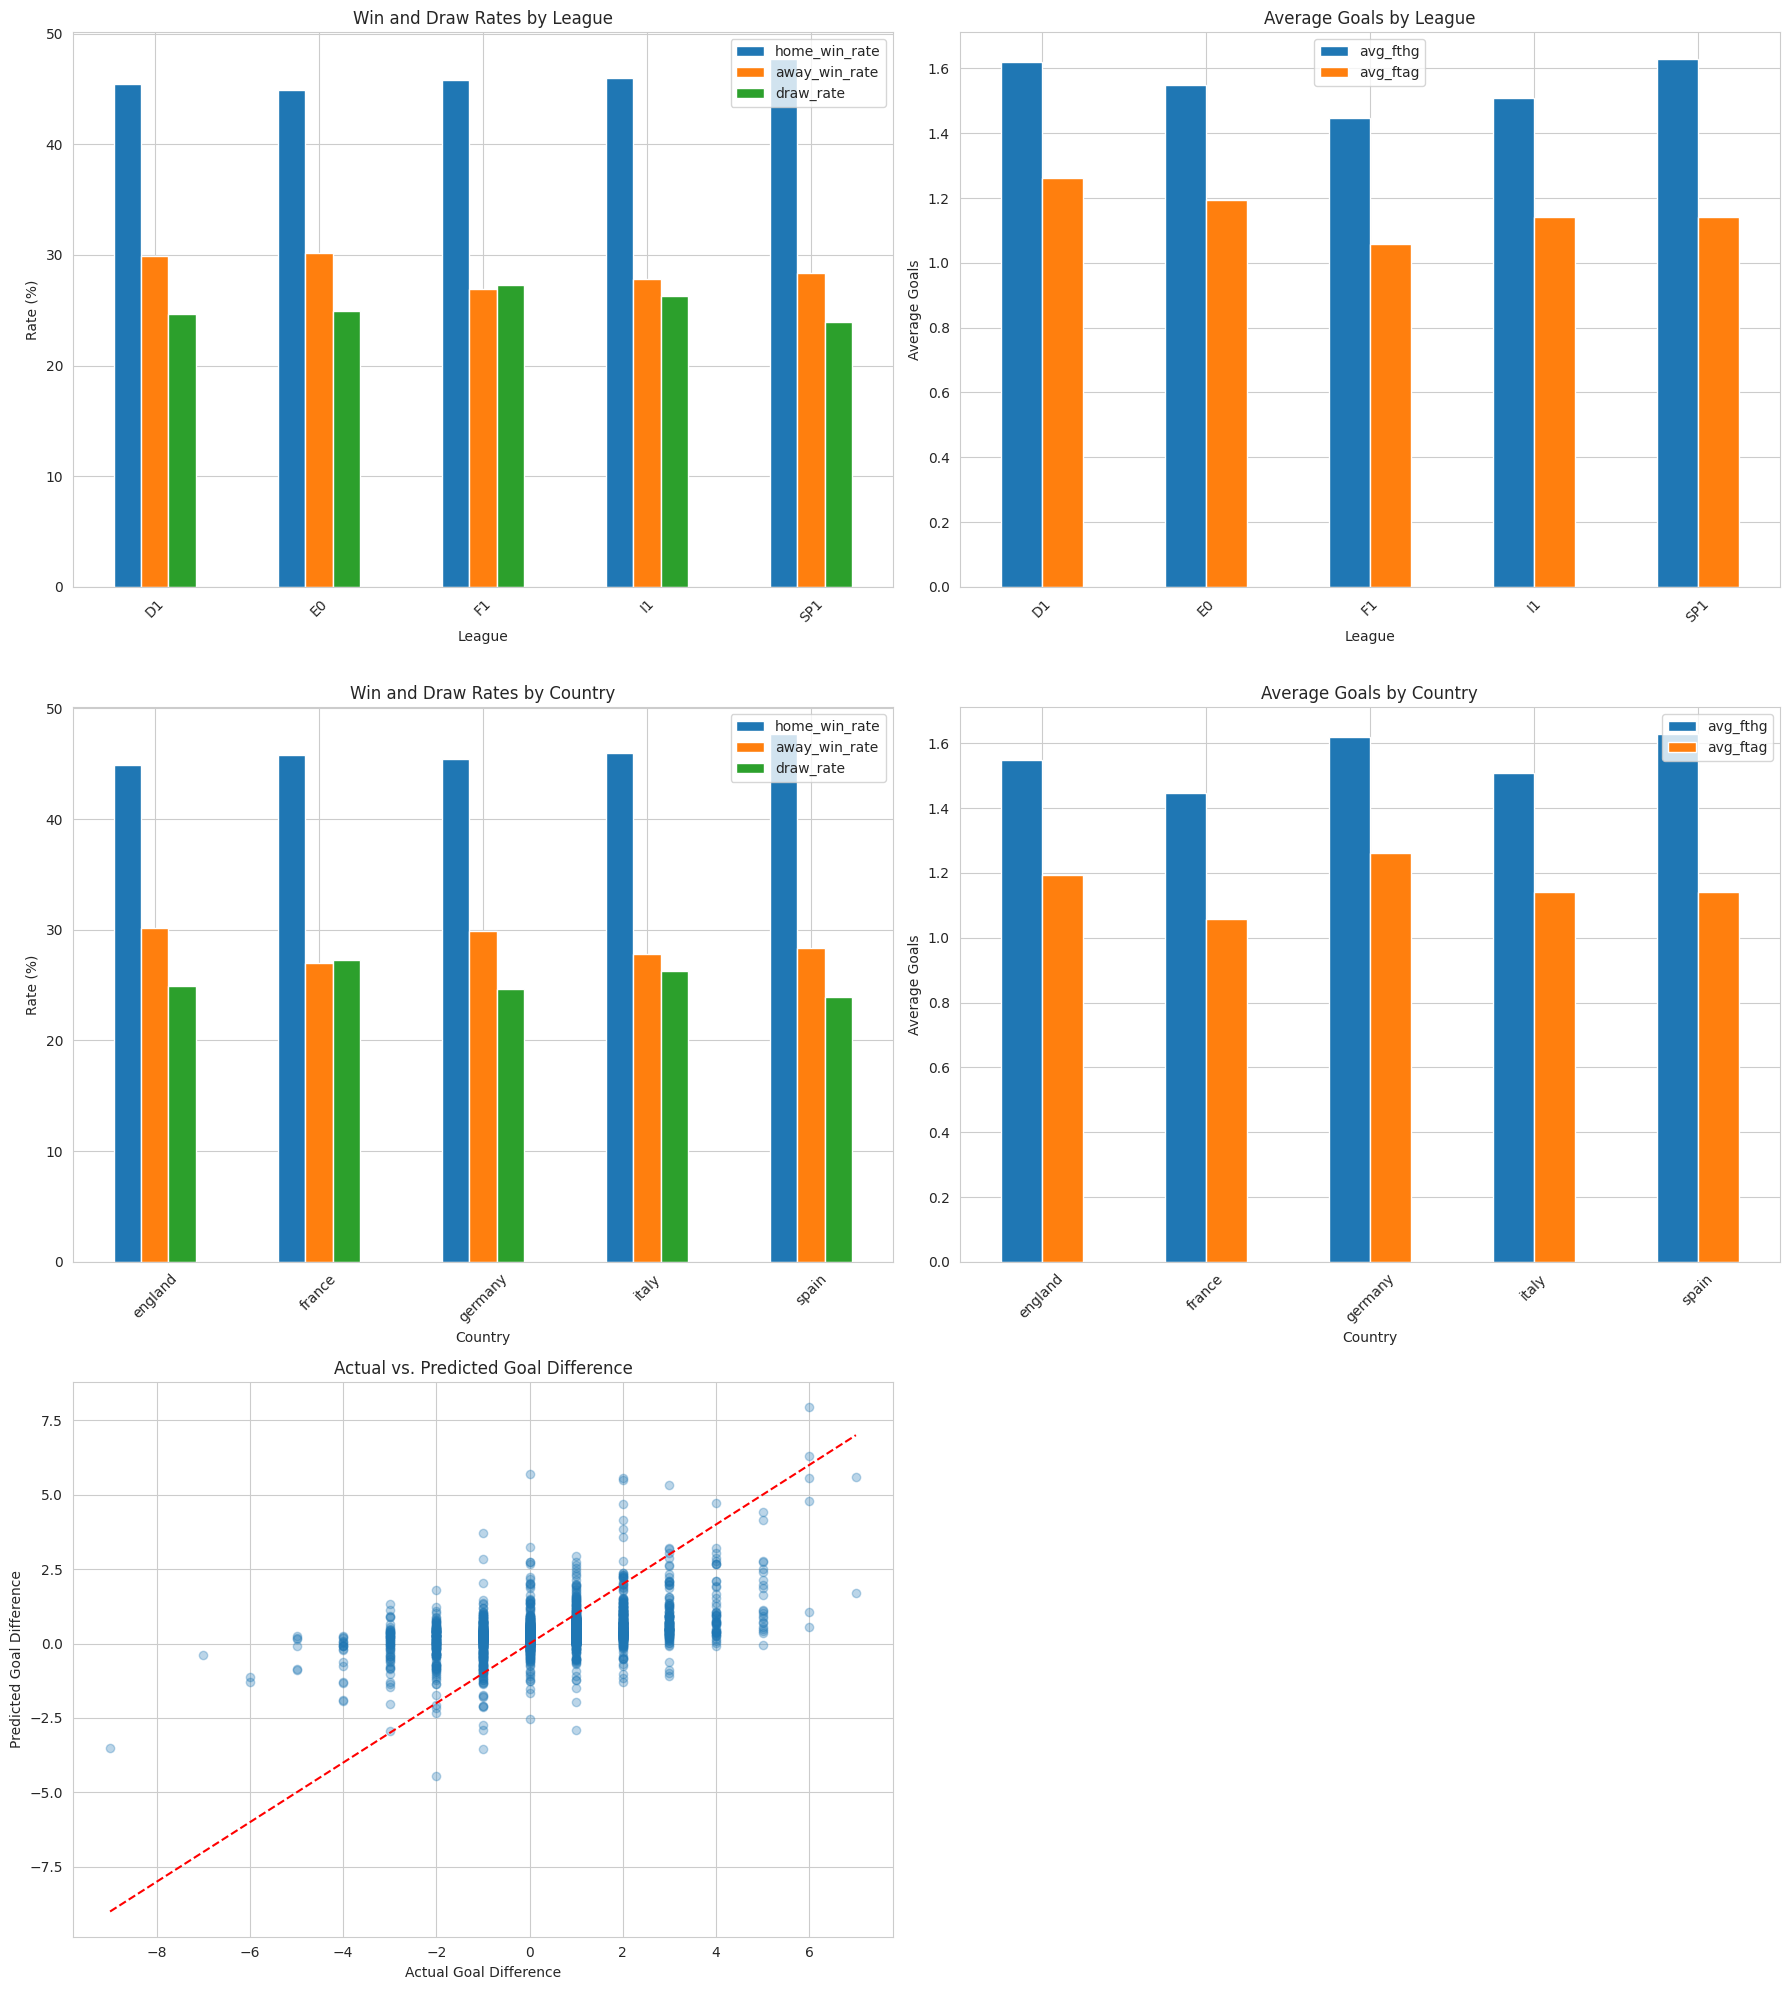

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1. Grouped bar chart for 'home_win_rate', 'away_win_rate', and 'draw_rate' by league
fig, axes = plt.subplots(3, 2, figsize=(18, 20))

league_analysis[['home_win_rate', 'away_win_rate', 'draw_rate']].plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Win and Draw Rates by League')
axes[0, 0].set_xlabel('League')
axes[0, 0].set_ylabel('Rate (%)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(loc='best')

# 2. Grouped bar chart for 'avg_fthg' and 'avg_ftag' by league
league_analysis[['avg_fthg', 'avg_ftag']].plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Average Goals by League')
axes[0, 1].set_xlabel('League')
axes[0, 1].set_ylabel('Average Goals')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(loc='best')

# 3. Grouped bar chart for 'home_win_rate', 'away_win_rate', and 'draw_rate' by country
country_analysis[['home_win_rate', 'away_win_rate', 'draw_rate']].plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Win and Draw Rates by Country')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(loc='best')

# 4. Grouped bar chart for 'avg_fthg' and 'avg_ftag' by country
country_analysis[['avg_fthg', 'avg_ftag']].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Goals by Country')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Average Goals')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(loc='best')

# 5. Scatter plot of actual vs. predicted goal difference
axes[2, 0].scatter(y_test, y_pred, alpha=0.3)
axes[2, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line
axes[2, 0].set_title('Actual vs. Predicted Goal Difference')
axes[2, 0].set_xlabel('Actual Goal Difference')
axes[2, 0].set_ylabel('Predicted Goal Difference')

# Remove unused subplot
fig.delaxes(axes[2,1])

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Provide a comprehensive study and evaluation of the sports data, summarizing key findings, insights from the analyses, and conclusions drawn from the visualizations and regression models.


## Summary:

### Data Analysis Key Findings

*   **Data Overview**: The dataset consists of `ginf.csv` (10,112 matches, 18 columns), `events.csv` (941,009 events, 22 columns), and `dictionary.txt` for mapping categorical data. `ginf.csv` contains match-level data including teams, scores, dates, and betting odds, with several odds columns initially showing significant missing values.
*   **Data Preparation**:
    *   The 'date' column in `df_matches` was converted to datetime objects.
    *   New features were successfully created in `df_matches`: `goal_difference`, `total_goals`, and `match_outcome` ('Home Win', 'Away Win', 'Draw').
    *   Missing values in `df_matches` betting odds columns (`odd_over`, `odd_under`, `odd_bts`, `odd_bts_n`) were imputed using their respective median values (e.g., `odd_over` with 2.03, `odd_bts` with 1.92).
    *   `dictionary.txt` was successfully parsed to map numerical event codes in `df_events` to descriptive labels. Missing values in these newly mapped descriptive columns were handled (e.g., 'Not Applicable' for `event_type2_description`, 'Unknown' for `shot_place_description`).
*   **Sports Analysis - League & Country Performance**:
    *   **League SP1 (Spain)** exhibited the highest home win rate at 47.73% and the highest average home goals at 1.63.
    *   **League F1 (France)** showed the lowest away win rate at 26.96% and the highest draw rate at 27.24%.
    *   These trends were consistent at the country level, with Spain mirroring SP1's strong home performance and France mirroring F1's lower away win and higher draw rates.
*   **Regression Analysis - Goal Difference Prediction**:
    *   A Linear Regression model was trained to predict goal difference using betting odds (`odd_h`, `odd_d`, `odd_a`).
    *   The model achieved a Mean Absolute Error (MAE) of 1.22, a Mean Squared Error (MSE) of 2.49, and an R-squared (R2) score of 0.20.
    *   The coefficient for `odd_h` was -0.21, suggesting that lower home odds (indicating a stronger favorite) are associated with a higher goal difference for the home team. Coefficients for `odd_d` (0.05) and `odd_a` (0.08) were positive but smaller.

### Insights or Next Steps

*   The R-squared score of 0.20 for the regression model indicates that while betting odds provide some predictive power for goal difference, a significant portion of the variance remains unexplained. Further analysis could incorporate more features (e.g., historical team performance, event statistics from `df_events`) to improve prediction accuracy.
*   The distinct patterns in win rates and average goals across different leagues and countries suggest varying playing styles or competitive balances. Investigating the factors contributing to these differences (e.g., team strengths, league structure, economic factors) could provide deeper insights into football dynamics.
